## Using Canadian Parliamentary Committees to Understand Correspondence Analysis

Large datasets can be confusing, especially when you have very little idea about what's actually inside the data.

Correspondence analysis (CA) and Multiple Correspondence Analysis (MCA) are ways to visualize data in two dimensional space.  The Compare class we have in development uses [MCA](https://pypi.python.org/pypi/mca/1.0) to quickly turn datasets into data plots.  

In this case, the dataset uses [parliamentary committees](http://www.parl.gc.ca/Committees/en/List) to show CA in action. When you use CA to describe the membership of various committees, we call this Bivariate or Affiliation Networks. Bi-variate means you have two difference groups you are studying. In this case, we are observing 1. parliamentary committees and 2. The MPs who belong to them.


True


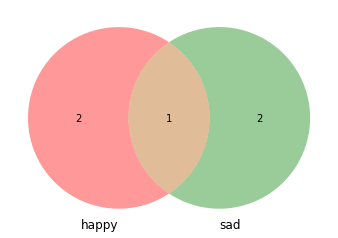

In [1]:
#First let's import the necessary library.
%matplotlib inline
from Compare import Compare
from json import dumps

# Let's test the class with the new dictionary.  When you have a dictionary with two keys, the Compare class will
# a simple venn diagram.

x = Compare({"happy": ["ecstatic", "bursting", "nostalgic"], "sad": ["morose", "depressed", "nostalgic"]},
            LABEL_BOTH_FACTORS=True)

print (x.LABEL_BOTH_FACTORS)

### Collecting the Data

This time I collected the data manually.  Eventually, perhaps this information will be available as an [Open Data source](http://docs.ckan.org/en/latest/api/).  Perhaps it already is.  Throw me a tweet [@ryandeschamps](http://www.twitter.com/ryandeschamps) if you think you know sometime more about this. I am always interested in Open Data.

So the following is a dictionary containing a number of Committees, followed by a list of tuples containing the name of a member/MP and the party they belong to.  You will notice some members belong to more than one committee (for instance A Vandenbeld belongs to both the Pay Equity (ESPE) and Status of Women (FEWO) committees. All the committees have more than one person (obviously). However, since we are most interested in how the committees are related, our focus will be on the MPs who belong to more than one.

In [2]:
#Let's work with Committees of the current (2015-2016) sitting parliament.
# In network lingo, we are working with "bivariate" or "affiliation" data.
# There are two sets of variables.  1. MPs and 2. Committees that the MPs belong to.
# Or worded in another way, we are examining how MPs are affiliated with different groups.


Committees = dict({"ESPE": #Pay equity
                   [("Lib", "A Vandenbeld"), ("Con", "S Stubbs"), ("NDP", "S Benson"), ("Con", "D Albas"), 
                    ("Lib", "M DeCourcey"), ("Lib", "J Dzerowicz"), ("Con", "M Gladu"), ("Lib", "T Sheehan"), 
                    ("Lib", "S Sidhu")],
                   
                   "FEWO": #Status of Women
                   [("Con", "M Gladu"), ("Lib", "P Damoff"), ("NDP", "S Malcomson"), ("Lib", "S Fraser"), 
                    ("Con", "R Harder"), ("Lib", "K Ludwig"), ("Lib", "E Nassif"), ("Lib", "R Sahota"), 
                    ("Lib", "A Vandenbeld"), ("Con", "K Vecchio")],
                   
                   "HESA": #Health
                   [("Lib", "B Casey"), ("Con", "L Webber"), ("NDP", "D Davies"), ("Lib", "R Ayoub"), 
                    ("Con", "C Carrie"), ("Lib", "D Eyolfson"), ("Con", "R Harder"), ("Lib", "DS Kang"), 
                    ("Lib", "J Oliver"), ("Lib", "S Sidhu")],
                  
                   "BILI": #Library of Parliament
                   [("Con", "G Brown"), ("Con", "K Diotte"), ("Con", "T Doherty"), ("Lib", "A Iacono"),
                   ("Con", "M Lake"), ("Lib", "M Levitt"), ("Lib", "E Nassif"), ("NDP", "AMT Quach"), 
                   ("Lib", "D Rusnak"), ("Lib", "M Serré"), ("Lib", "G Sikand"), ("Lib", "S Simms")],
                   
                   "RNNR": #Natural Resources
                   [("Lib", "J Maloney"), ("Con", "J Barlow"), ("NDP", "R Cannings"), ("Con", "C Bergen"),
                   ("Lib", "TJ Harvey"), ("Lib", "D Lemieux"), ("Lib", "MV Mcleod"), ("Lib", "M Serré"), 
                   ("Con", "S Stubbs"), ("Lib", "G Tan")],
                   
                   "ACVA": #Veteran's Affairs
                   [("Lib", "NR Ellis"), ("Con", "R Kitchen"), ("NDP", "I Mathyssen"), ("Lib", "B Bratina"),
                   ("Con", "A Clarke"), ("Lib", "D Eyolfson"), ("Lib", "C Fraser"), ("Lib", "A Lockhart"), 
                   ("Lib", "S Romando"), ("Con", "C Wagantall")],
                   
                   "JUST": #Justice and Human Rights
                   [("Lib", "A Housefather"), ("Con", "T Falk"), ("NDP", "M Rankin"), ("Lib", "C Bittle"), 
                    ("Con", "M Cooper"), ("Lib", "C Fraser"), ("Lib", "A Hussen"), ("Lib", "I Khalid"), 
                    ("Lib", "R McKinnon"), ("Con", "R Nicholson")],
                   
                   "TRAN": #Transport, Infrastructure and Communities
                   [("Lib", "JA Sgro"), ("Con", "L Berthold"), ("NDP", "L Duncan"), ("Lib", "V Badawey"), 
                    ("Con", "K Block"), ("Lib", "S Fraser"), ("Lib", "K Hardie"), ("Lib", "A Iacono"), 
                    ("Lib", "G Sikand"), ("Con", "DL Watts")],
                   
                   "AGRI": #Agriculture and Agri-food
                   [("Lib", "P Finnigan"), ("Con", "B Shipley"), ("NDP", "RE Brosseau"), ("Con", "D Anderson"),
                   ("Lib", "P Breton"), ("Lib", "F Drouin"), ("Con", "J Gourde"), ("Lib", "A Lockhart"), 
                    ("Lib", "L Longfield"), ("Lib", "J Peschisolido")],
                   
                   "FOPO": #Fisheries and Oceans
                   [("Lib", "S Simms"), ("Con", "R Sopuck"), ("NDP", "F Donnelly"), ("Con", "M Arnold"), 
                    ("Con", "T Doherty"), ("Con", "P Finnigan"), ("Lib", "K Hardie"), ("Lib", "B Jordan"),
                   ("Lib", "K McDonald"), ("Lib", "RJ Morrissey")]
                  })


There are 2 members in common. They are : {'A Vandenbeld', 'M Gladu'}


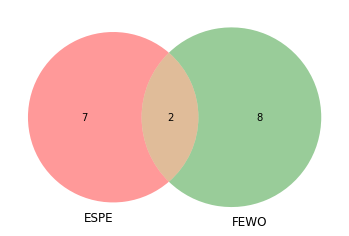

In [3]:
# Let's just start with a case of two committees and focus just on the people (not their parties)
EquityStatus = {"ESPE": [y for x, y in Committees["ESPE"]], "FEWO": [y for x, y in Committees["FEWO"]]}
equityStatus = Compare(EquityStatus)

print("There are "+ str(len(equityStatus.V2_AB)) + " members in common. They are : " + str(equityStatus.V2_AB))


Now for the Correspondence Analysis:
 

First, we can examine the factors separately.  Along the horizontal axis, the committees appear in a spectrum from Transport on the left to Justice on the right.

Along the vertical axis, a spectrum runs from Fisheries and Oceans to Pay Equity.
We could also name the quadrants.  They aren't perfect (Natural Resources is connected to Status of Women?) but they 
offer a rough outline of how the committees connect.

|               |               |
| :------------ |:-------------:|
| INDUSTRY      | COMPENSATION  |
| EQUAL RIGHTS  | HEALTH        |

Three clusters also appear.  One with Fisheries and Oceans, Transport and Library of Parliament, another with Justice and Veteran's Affairs (with Agriculture and Agri-food not far away) and the largest one with Health, Status of Women and Natural Resources.



['HESA', 'JUST', 'TRAN', 'AGRI', 'ACVA', 'ESPE', 'FOPO', 'RNNR', 'BILI', 'FEWO']
[  7.42540220e-01   6.34700457e-01   2.86869397e-01   2.75001456e-01
   1.25045699e-01   7.67030980e-02   4.83457500e-02   8.47153562e-03
   7.08346598e-04]


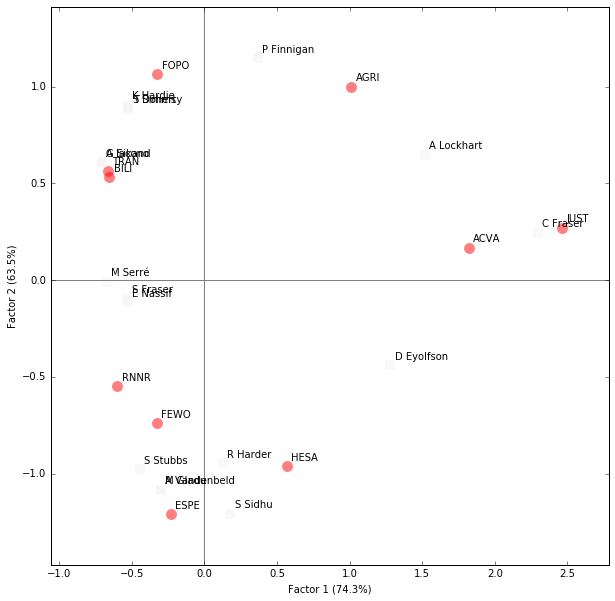

In [4]:
# Now let's see what ca does:
LABEL_FOR_TWO = False
Committee = dict()

for com, members in Committees.items():
    Committee[com] = [y for x, y in members]
committees_ca = Compare(Committee, LABEL_BOTH_FACTORS=True)

